### 5. DBSCAN(Density Based Spatial Clustering of Applications with Noise)
- "군집 기준: 핵심 포인트들 연결"
- 기하학적으로 복잡한 데이터에 대해서도 군집을 잘 수행하는데, 특정 공간 내의 밀도를 측정하기 때문.
- 주요 핵심 파라미터로는 eps(입실론 반경), min_samples(최소 데이터(자기자신 포함)) 가 있음.
- "핵심 포인트": 개별 포인트의 입실론 반경 내에 최소 데이터 수 이상이 있는 포인트. / 핵심 포인트의 입실론 반경 내의 타 포인트들은 이웃 포인트
- 최소 데이터 수 이상 있진 않지만 이웃 포인트로 핵심 포인트를 갖고 있다면 경계 포인트 / 최소데이터수x,이웃포인트로 핵심포인트x 면 노이즈 포인트

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#iris 데이터 가져오기
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### DBSCAN(eps, min_samples, metric)
- eps: 입실론 반경
- min_samples: 최소 데이터 수
- meric: 거리 계산 방식(보통 유클리디언)

In [4]:
#객체
dbscan = DBSCAN(eps = 0.6, min_samples=8, metric='euclidean')
#학습 및 결과 
dbscan_label = dbscan.fit_predict(iris.data)
#df 저장
iris_df['dbscan'] = dbscan_label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [5]:
#원본 target vs dbscan 결과 비교
iris_df.groupby('target')['dbscan'].value_counts() #여기서 -1은 노이즈 값을 의미.

target  dbscan
0        0        49
        -1         1
1        1        46
        -1         4
2        1        42
        -1         8
Name: dbscan, dtype: int64

- 시각화(pca로 2차원변형 후 시각화)

In [9]:
#pca 수행
from sklearn.decomposition import PCA
#객체
pca = PCA(n_components=2, random_state=0)
#수행
X_pca = pca.fit_transform(iris.data) #X피처 4개->2개
iris_df['ftr1']=X_pca[:,0]
iris_df['ftr2']=X_pca[:,1]
iris_df.head(3) ###밑의 시각화그래프에서 dbscan의 클러스터링 결과에 따라 ftr1,ftr2에 대해 2차원 시각화

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


In [10]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter : #iscenter는 중심점 좌표를 객체에서 속성으로 제공하는지?(만일 False라면 중심점을 표시하지 않음)
        centers = clusterobj.cluster_centers_
        
    ###################################################################이전의 시각화 코드와 매우 동일
    unique_labels = np.unique(dataframe[label_name].values) #레이블의 유니크한 값
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels: 
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1: #만일 레이블의 유니크값에 -1이 있다면 노이즈가 있는 것. --->dbscan에서 사용!
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label) #보통은 이경우. 클러스터링을 한 후에 legend에 '클러스터 #번'이라고 입력해주는 것임.
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
                                                                     #일반적인 스캐터는 위의 markers에서 원(0번),네모(1번),세모(2번)이고 노이즈는 -1번째니까 *(별모양,-1번)
        
        if iscenter: #중심점 좌표를 제공한다면 중심점 좌표를 찍음.
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    ######################################################################
            
    if isNoise: #만일 노이즈 값이 있다면 legend의 위치를 위의 중심에 놓고
        legend_loc='upper center'
    else: legend_loc='upper right' #노이즈값이 없는 보통의 경우라면 위의 오른쪽에 둔다.
    
    plt.legend(loc=legend_loc) #legend 설정
    plt.show()

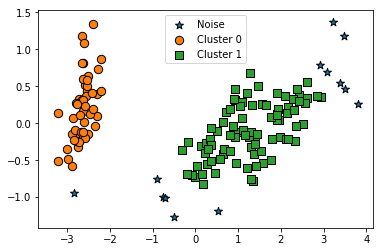

In [11]:
#시각화
visualize_cluster_plot(dbscan, iris_df, 'dbscan',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별)

- eps값을 0.6에서 0.8로 늘려보자.->eps값을 늘리면 노이즈는 적어지고, min_samples값을 늘리면 노이즈는 많아진다.

In [13]:
#iris 데이터 가져오기
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
#객체
dbscan = DBSCAN(eps = 0.8, min_samples=8, metric='euclidean')
#학습 및 결과 
dbscan_label = dbscan.fit_predict(iris.data)
#df 저장
iris_df['dbscan'] = dbscan_label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [14]:
iris_df.groupby('target')['dbscan'].value_counts() #노이즈값(-1)이 많이 줄음!

target  dbscan
0        0        50
1        1        50
2        1        47
        -1         3
Name: dbscan, dtype: int64

In [15]:
#pca 수행
from sklearn.decomposition import PCA
#객체
pca = PCA(n_components=2, random_state=0)
#수행
X_pca = pca.fit_transform(iris.data) #X피처 4개->2개
iris_df['ftr1']=X_pca[:,0]
iris_df['ftr2']=X_pca[:,1]
iris_df.head(3) ###밑의 시각화그래프에서 dbscan의 클러스터링 결과에 따라 ftr1,ftr2에 대해 2차원 시각화

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


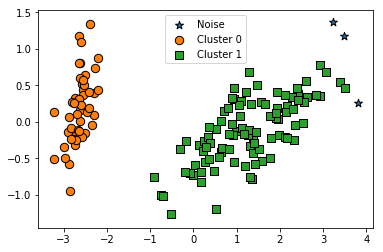

In [16]:
#시각화) 노이즈가 확실히 이전 그래프보다 줄어들음.
visualize_cluster_plot(dbscan, iris_df, 'dbscan',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 

- eps을 0.6 고정, min_samples를 8->16 증가: 노이즈 증가

In [17]:
#객체
dbscan = DBSCAN(eps = 0.6, min_samples=16, metric='euclidean')
#학습 및 결과 
dbscan_label = dbscan.fit_predict(iris.data)
#df 저장
iris_df['dbscan'] = dbscan_label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


target  dbscan
0        0        48
        -1         2
1        1        44
        -1         6
2        1        36
        -1        14
Name: dbscan, dtype: int64


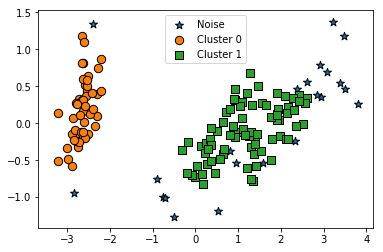

In [19]:
#시각화) 노이즈가 이전 그래프보다 많아짐.
print(iris_df.groupby('target')['dbscan'].value_counts()) #노이즈값(-1)이 많이생김!
visualize_cluster_plot(dbscan, iris_df, 'dbscan',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 

### make_circles(n_samples, shuffle, noise, factor, random_state) 
- 항상 X 피처 2개인 2차원 데이터를 생성. 내부 원과 외부 원으로 되어 있는 복잡한 기하학적 분포를 가진 데이터를 만듦
- n_samples: 데이터 개수
- shuffle: 섞을 것인지?
- noise: 노이즈 데이터 세트의 비율
- factor: 외부 원과 내부 원의 scale 비율

In [31]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5, random_state=0) #원은 절반 크기로 #X 피처는 항상 2개(X1, X2)
df = pd.DataFrame(X, columns=['ftr1','ftr2'])
df['target']=y
df.head(3)

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0


In [32]:
np.unique(df.target)

array([0, 1], dtype=int64)

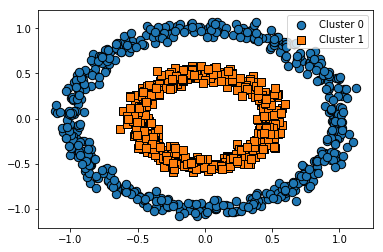

In [33]:
#시각화 함수에 적용(원본 데이터-정답 데이터)
visualize_cluster_plot(None, df, 'target',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 
                                                                                        #노이즈가 없음-dbscan으로 군집화하지 않았으므로. target으로 군집화

- 이제부터 순서대로 k-means / GMM / dbscan을 적용하여 데이터를 군집화! + 시각화

In [34]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [36]:
#k-means
#객체
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=0) #클러스터 개수는 2개
#학습 및 결과 
kmeans_label = kmeans.fit_predict(X)
#df 저장
df['kmeans'] = kmeans_label
df.head()

,ftr1,ftr2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,0
3,0.316549,0.312730,1,1
4,-0.304804,0.407563,1,1


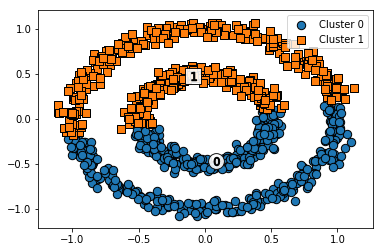

In [37]:
#시각화 함수에 적용(kmeans)
visualize_cluster_plot(kmeans, df, 'kmeans',iscenter=True) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 
                                                                                        #노이즈가 없음-dbscan으로 군집화하지 않았으므로. kmeans로 군집화
                                                                                            ##복잡한 구조의 데이터다 보니 kmeans가 제대로 군집화하지 못함.

In [38]:
#gmm
#객체
gmm = GaussianMixture(n_components=2, random_state=0) #클러스터(모델) 개수는 2개
#학습 및 결과 
gmm_label = gmm.fit_predict(X)
#df 저장
df['gmm'] = gmm_label
df.head()

,ftr1,ftr2,target,kmeans,gmm
0,0.519781,-0.015981,1,0,1
1,-0.057719,-0.420279,1,0,1
2,-0.805155,-0.662227,0,0,0
3,0.316549,0.312730,1,1,1
4,-0.304804,0.407563,1,1,0


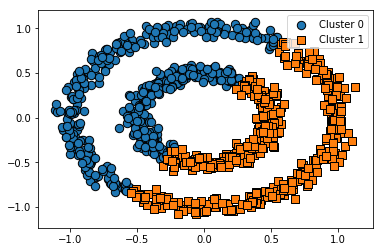

In [39]:
#시각화 함수에 적용(gmm)
visualize_cluster_plot(gmm, df, 'gmm',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 
                                                                                        #노이즈가 없음-dbscan으로 군집화하지 않았으므로. gmm으로 군집화
                                                                                            ##복잡한 구조의 데이터다 보니 gmm이 제대로 군집화하지 못함.

In [40]:
#객체
dbscan = DBSCAN(eps = 0.2, min_samples=10, metric='euclidean')
#학습 및 결과 
dbscan_label = dbscan.fit_predict(X)
#df 저장
df['dbscan'] = dbscan_label
df.head()

,ftr1,ftr2,target,kmeans,gmm,dbscan
0,0.519781,-0.015981,1,0,1,0
1,-0.057719,-0.420279,1,0,1,0
2,-0.805155,-0.662227,0,0,0,1
3,0.316549,0.312730,1,1,1,0
4,-0.304804,0.407563,1,1,0,0


In [45]:
df.dbscan.unique()

array([0, 1], dtype=int64)

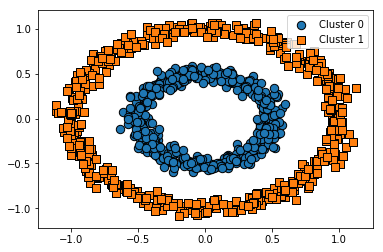

In [41]:
#시각화 함수에 적용(dbscan)
visualize_cluster_plot(dbscan, df, 'dbscan',iscenter=False) #여기서는 군집이 0,1 2개이므로 원과 네모/노이즈는 -1번(별) 
                                                                                            #dbscan으로 군집화하였지만 노이즈가 없음
                                                                                            ##복잡한 구조의 데이터다 보니 dbscan이 잘 군집화함.

- 번외) meanshift 적용

In [47]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [57]:
best_bw = estimate_bandwidth(X, quantile=0.3) #quantile 0.3으로 할 시 최적의 군집화 개수 k=1
#객체
meanshift = MeanShift(bandwidth = best_bw)
#학습 및 결과 
ms_label = meanshift.fit_predict(X)
#df 저장
df['meanshift'] = ms_label
print(np.unique(df.meanshift))
df.head()

[0]


,ftr1,ftr2,target,kmeans,gmm,dbscan,meanshift
0,0.519781,-0.015981,1,0,1,0,0
1,-0.057719,-0.420279,1,0,1,0,0
2,-0.805155,-0.662227,0,0,0,1,0
3,0.316549,0.312730,1,1,1,0,0
4,-0.304804,0.407563,1,1,0,0,0


- +) 가장 최적의 bw를 구할 때 quantile 값을 넣어야 하는데 무엇을 넣어도 군집화개수k가 계속 1개 또는 3개만 나옴ㅜㅜ

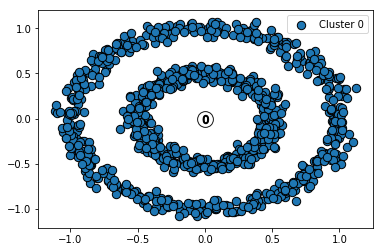

In [58]:
#시각화 함수에 적용(dbscan)
visualize_cluster_plot(meanshift, df, 'meanshift',iscenter=True) #여기서는 군집이 0,1,2 3개이므로 원과 네모,세모/노이즈는 -1번(별) 
                                                                                                    #노이즈가 없음-dbscan으로 군집화하지 않았으므로. 
                                                                                            ##복잡한 구조의 데이터다 보니 meanshift가 제대로 군집화하지 못함.
                                                                                                

In [59]:
best_bw = estimate_bandwidth(X, quantile=0.25)  #quantile 0.25으로 할 시 최적의 군집화 개수 k=3
#객체
meanshift = MeanShift(bandwidth = best_bw)
#학습 및 결과 
ms_label = meanshift.fit_predict(X)
#df 저장
df['meanshift'] = ms_label
print(np.unique(df.meanshift))
df.head()

[0 1 2]


,ftr1,ftr2,target,kmeans,gmm,dbscan,meanshift
0,0.519781,-0.015981,1,0,1,0,2
1,-0.057719,-0.420279,1,0,1,0,0
2,-0.805155,-0.662227,0,0,0,1,0
3,0.316549,0.312730,1,1,1,0,2
4,-0.304804,0.407563,1,1,0,0,1


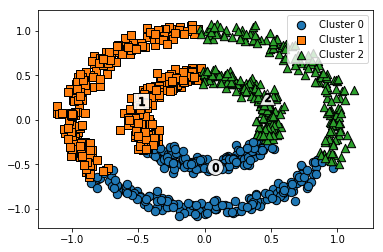

In [61]:
#시각화 함수에 적용(dbscan)
visualize_cluster_plot(meanshift, df, 'meanshift',iscenter=True) #여기서는 군집이 0,1,2 3개이므로 원과 네모,세모/노이즈는 -1번(별) 
                                                                                                    #노이즈가 없음-dbscan으로 군집화하지 않았으므로. 
                                                                                            ##복잡한 구조의 데이터다 보니 meanshift가 제대로 군집화하지 못함.
